In [1]:
#Getting an api_key for Attom got to: https://api.developer.attomdata.com/signup
#Create and account, for company put UofT Bootcamp and for industry put other. 
#Dependencies
import requests
import pandas as pd
import json
from config import attom_key
from pathlib import Path 
import http.client
import matplotlib.pyplot as plt
#For use with random delays
import time
import random

city_zips = {"Austin": [78610, 78613, 78617, 78641, 78652, 78653, 78660, 78664, 78681, 78701, 78702, 78703, 78704, 78705, 78712, 78717, 78719, 78721, 78722, 78723, 78724, 78725, 78726, 78727, 78728, 78729, 78730, 78731, 78732, 78733, 78734, 78735, 78736, 78737, 78738, 78739, 78741, 78742, 78744, 78745, 78746, 78747, 78748, 78749, 78750, 78751, 78752, 78753, 78754, 78756, 78757, 78758, 78759],
             "Chicago": [60007, 60018, 60068, 60106, 60131, 60176, 60601, 60602, 60603, 60604, 60605, 60606, 60607, 60608, 60609, 60610, 60611, 60612, 60613, 60614, 60615, 60616, 60617, 60618, 60619, 60620, 60621, 60622, 60623, 60624, 60625, 60626, 60628, 60629, 60630, 60631, 60632, 60633, 60634, 60636, 60637, 60638, 60639, 60640, 60641, 60642, 60643, 60644, 60645, 60646, 60647, 60649, 60651, 60652, 60653, 60654, 60655, 60656, 60657, 60659, 60660, 60661, 60706, 60707, 60714, 60804, 60827], 
             "Denver": [80012, 80014, 80022, 80033, 80123, 80127, 80201, 80202, 80203, 80204, 80205, 80206, 80207, 80208, 80209, 80210, 80211, 80212, 80214, 80215, 80216, 80217, 80218, 80219, 80220, 80221, 80222, 80223, 80224, 80225, 80226, 80227, 80228, 80229, 80230, 80231, 80232, 80233, 80234, 80235, 80236, 80237, 80238, 80239, 80241, 80243, 80244, 80246, 80247, 80248, 80249, 80250, 80256, 80257, 80259, 80260, 80261, 80263, 80264, 80265, 80266, 80271, 80273, 80274, 80281, 80290, 80291, 80293, 80294, 80299], 
             "Memphis": [38103, 38104, 38105, 38106, 38107, 38108, 38109, 38111, 38112, 38117, 38125, 38126, 38127, 38128, 38133, 38134, 38135, 38138, 38139, 38141, 38017, 38002, 38016, 38018, 38028, 38066, 38060], 
             "New York": [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10044, 10065, 10069, 10075, 10103, 10110, 10111, 10112, 10115, 10119, 10128, 10152, 10153, 10154, 10162, 10165, 10167, 10168, 10169, 10170, 10171, 10172, 10173, 10174, 10177, 10199, 10271, 10278, 10279, 10280, 10282, 10301, 10302, 10303, 10304, 10305, 10306, 10307, 10308, 10309, 10310, 10311, 10312, 10314, 10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467, 10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 11001, 11003, 11004, 11005, 11040, 11101, 11102, 11103, 11104, 11105, 11106, 11109, 11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11351, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364, 11365, 11366, 11367, 11368, 11369, 11370, 11371, 11372, 11373, 11374, 11375, 11377, 11378, 11379, 11385, 11411, 11412, 11413, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11423, 11424, 11425, 11426, 11427, 11428, 11429, 11430, 11432, 11433, 11434, 11435, 11436, 11451, 11691, 11692, 11693, 11694, 11697], 
             "San Francisco": [94102, 94103, 94104, 94105, 94107, 94108, 94109, 94110, 94111, 94112, 94114, 94115, 94116, 94117, 94118, 94121, 94122, 94123, 94124, 94127, 94128, 94129, 94130, 94131, 94132, 94133, 94134, 94141, 94143, 94158, 94188]
            }
#This code take almost an hour to run

In [2]:
#Run through a city's zipcodes
headers = {
    'accept': "application/json", 
    'apikey': attom_key
    }

conn = http.client.HTTPSConnection("api.gateway.attomdata.com")

city = "Austin"
zips = city_zips[city]
aus_data = []

#For loop to run through all zipcodes
for z in zips:
    conn.request("GET", "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?startSaleSearchDate=2020/01/01&endSaleSearchDate=2022/12/31&postalcode="+str(z)+"&minBeds=1&maxBeds=3&propertytype=RESIDENTIAL%20(NEC)&minuniversalsize=0&maxuniversalsize=1500&page=1&pagesize=100&orderBy=saleAmt+desc", headers=headers)
    print(f"Processing zipcode: {z}")
    res = conn.getresponse()
    data = res.read()
    aus = json.loads(data.decode('utf-8'))

#For loop to add or withhold values from DataFrame
    for prop in data:
        if aus["status"]["msg"] == "SuccessWithResult":
            try:
                city = aus["property"][0]["address"]["line2"]
                address = aus["property"][0]["address"]["oneLine"]
                proptype = aus["property"][0]["summary"]["propsubtype"]
                beds = aus["property"][0]["building"]["rooms"]["beds"]
                baths = aus["property"][0]["building"]["rooms"]["bathstotal"]
                sqfeet = aus["property"][0]["building"]["size"]["universalsize"]
                price = aus["property"][0]["sale"]["amount"]["saleamt"]
                salesday = aus["property"][0]["sale"]["saleTransDate"]
            except KeyError:
                city = None
                address = None
                proptype = None
                beds = None
                baths = None
                sqfeet = None
                price = None
                salesday = None
            #Append the City information into house_data list
            aus_data.append({"City State Zip": city,
                           "Address": address, 
                           "House Type": proptype, 
                           "# of Beds": beds, 
                           "# of Baths": baths,
                           "House size(sqf)": sqfeet, 
                           "Price": price,
                            "Sales Date": salesday})
        #If the apikey maxes out or there are noresults the loop skips those responses and continues
        elif aus["status"]["msg"]== "Unauthorized" or aus["status"]["msg"]== "SuccessWithoutResult":
            continue
        
    # set random int 7-9 (in case they don't want automated...)
    r = random.randrange(7,10)
    # delay for the random time (s) frame
    time.sleep(r)
    

Processing zipcode: 78610
Processing zipcode: 78613
Processing zipcode: 78617
Processing zipcode: 78641
Processing zipcode: 78652
Processing zipcode: 78653
Processing zipcode: 78660
Processing zipcode: 78664
Processing zipcode: 78681
Processing zipcode: 78701
Processing zipcode: 78702
Processing zipcode: 78703
Processing zipcode: 78704
Processing zipcode: 78705
Processing zipcode: 78712
Processing zipcode: 78717
Processing zipcode: 78719
Processing zipcode: 78721
Processing zipcode: 78722
Processing zipcode: 78723
Processing zipcode: 78724
Processing zipcode: 78725
Processing zipcode: 78726
Processing zipcode: 78727
Processing zipcode: 78728
Processing zipcode: 78729
Processing zipcode: 78730
Processing zipcode: 78731
Processing zipcode: 78732
Processing zipcode: 78733
Processing zipcode: 78734
Processing zipcode: 78735
Processing zipcode: 78736
Processing zipcode: 78737
Processing zipcode: 78738
Processing zipcode: 78739
Processing zipcode: 78741
Processing zipcode: 78742
Processing z

In [3]:
#Create DataFrame
ausdf = pd.DataFrame(aus_data)
#Remove duplicates
ausdf = ausdf.drop_duplicates()
#Reset index
ausdf = ausdf.reset_index(drop=True)
#Display DataFrame
if ausdf.empty:
    print("No data avalible for Chicago")
#Drop rows with NaN values
elif ausdf["Price"].isnull().item:
    ausdf = ausdf.dropna(subset=["Price"])
    print(ausdf)

            City State Zip                                        Address  \
0      DEL VALLE, TX 78617  6509 CONESTOGA WAGON WAY, DEL VALLE, TX 78617   
1          MANOR, TX 78653            16400 FETCHING AVE, MANOR, TX 78653   
2   PFLUGERVILLE, TX 78660        1012 BETHEL WAY, PFLUGERVILLE, TX 78660   
3         AUSTIN, TX 78701         904 WEST AVE STE 201, AUSTIN, TX 78701   
4         AUSTIN, TX 78702          1609 WALNUT AVE # B, AUSTIN, TX 78702   
5         AUSTIN, TX 78703        2612 W 12TH ST UNIT 4, AUSTIN, TX 78703   
6         AUSTIN, TX 78704         3505 VILLA CT UNIT 5, AUSTIN, TX 78704   
7         AUSTIN, TX 78721                  5924 LUX ST, AUSTIN, TX 78721   
8         AUSTIN, TX 78723               3616 CLARY WAY, AUSTIN, TX 78723   
9         AUSTIN, TX 78724            8913 SOUTHWICK DR, AUSTIN, TX 78724   
10        AUSTIN, TX 78725               3514 BATSON DR, AUSTIN, TX 78725   
12        AUSTIN, TX 78734              2706 DELORES CT, AUSTIN, TX 78734   

In [4]:
#Run through a city's zipcodes
headers = {
    'accept': "application/json", 
    'apikey': attom_key
    }

conn = http.client.HTTPSConnection("api.gateway.attomdata.com")

city = "Chicago"
zips = city_zips[city]
chi_data = []

#For loop to run through all zipcodes
for z in zips:
    conn.request("GET", "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?startSaleSearchDate=2020/01/01&endSaleSearchDate=2022/12/31&postalcode="+str(z)+"&minBeds=1&maxBeds=3&propertytype=RESIDENTIAL%20(NEC)&minuniversalsize=0&maxuniversalsize=1500&page=1&pagesize=100&orderBy=saleAmt+desc", headers=headers)
    print(f"Processing zipcode: {z}")
    res = conn.getresponse()
    data = res.read()
    chi = json.loads(data.decode('utf-8'))

#For loop to add or withhold values from DataFrame
    for prop in data:
        if chi["status"]["msg"] == "SuccessWithResult":
            try:
                city = chi["property"][0]["address"]["line2"]
                address = chi["property"][0]["address"]["oneLine"]
                proptype = chi["property"][0]["summary"]["propsubtype"]
                beds = chi["property"][0]["building"]["rooms"]["beds"]
                baths = chi["property"][0]["building"]["rooms"]["bathstotal"]
                sqfeet = chi["property"][0]["building"]["size"]["universalsize"]
                price = chi["property"][0]["sale"]["amount"]["saleamt"]
                salesday = chi["property"][0]["sale"]["saleTransDate"]
            except KeyError:
                city = None
                address = None
                proptype = None
                beds = None
                baths = None
                sqfeet = None
                price = None
                salesday = None
                
            #Append the City information into house_data list
            chi_data.append({"City State Zip": city,
                           "Address": address, 
                           "House Type": proptype, 
                           "# of Beds": beds, 
                           "# of Baths": baths,
                           "House size(sqf)": sqfeet, 
                           "Price": price,
                           "Sales Date": salesday})
        #If the apikey maxes out or there are noresults the loop skips those responses and continues
        elif chi["status"]["msg"]== "Unauthorized" or chi["status"]["msg"]== "SuccessWithoutResult":
            continue
        
    #Set random int 7-9 (in case they don't want automated...)
    r = random.randrange(7,10)
    #Delay for the random time (s) frame
    time.sleep(r)

Processing zipcode: 60007
Processing zipcode: 60018
Processing zipcode: 60068
Processing zipcode: 60106
Processing zipcode: 60131
Processing zipcode: 60176
Processing zipcode: 60601
Processing zipcode: 60602
Processing zipcode: 60603
Processing zipcode: 60604
Processing zipcode: 60605
Processing zipcode: 60606
Processing zipcode: 60607
Processing zipcode: 60608
Processing zipcode: 60609
Processing zipcode: 60610
Processing zipcode: 60611
Processing zipcode: 60612
Processing zipcode: 60613
Processing zipcode: 60614
Processing zipcode: 60615
Processing zipcode: 60616
Processing zipcode: 60617
Processing zipcode: 60618
Processing zipcode: 60619
Processing zipcode: 60620
Processing zipcode: 60621
Processing zipcode: 60622
Processing zipcode: 60623
Processing zipcode: 60624
Processing zipcode: 60625
Processing zipcode: 60626
Processing zipcode: 60628
Processing zipcode: 60629
Processing zipcode: 60630
Processing zipcode: 60631
Processing zipcode: 60632
Processing zipcode: 60633
Processing z

In [5]:
#Create DataFrame
chidf = pd.DataFrame(chi_data)
#Remove duplicates
chidf = chidf.drop_duplicates()
#Reset index
chidf = chidf.reset_index(drop=True)
#Display DataFrame
if chidf.empty:
    print("No data avalible for Chicago")
#Drop rows with NaN values
elif chidf["Price"].isnull().item:
    chidf = chidf.dropna(subset=["Price"])
    print(chidf)

      City State Zip                                     Address   House Type  \
1  CHICAGO, IL 60608           2207 W 21ST PL, CHICAGO, IL 60608  Residential   
2  CHICAGO, IL 60618    2250 W IRVING PARK RD, CHICAGO, IL 60618  Residential   
3  CHICAGO, IL 60622     1739 W JULIAN ST # 1, CHICAGO, IL 60622  Residential   
4  CHICAGO, IL 60647    2226 N SAWYER AVE # 1, CHICAGO, IL 60647  Residential   
5  CHICAGO, IL 60657  2817 N LAKEWOOD AVE # 2, CHICAGO, IL 60657  Residential   

   # of Beds  # of Baths  House size(sqf)      Price  Sales Date  
1        2.0         1.0            940.0   520000.0  2021-11-30  
2        3.0         2.0            930.0  1850000.0  2022-06-14  
3        2.0         1.0            650.0   685000.0  2021-07-02  
4        3.0         2.0           1368.0   950000.0  2021-12-14  
5        2.0         1.0           1484.0   950000.0  2020-04-29  


In [6]:
#Run through a city's zipcodes
headers = {
    'accept': "application/json", 
    'apikey': attom_key
    }

conn = http.client.HTTPSConnection("api.gateway.attomdata.com")

city = "Denver"
zips = city_zips[city]
den_data = []

#For loop to run through all zipcodes
for z in zips:
    conn.request("GET", "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?startSaleSearchDate=2020/01/01&endSaleSearchDate=2022/12/31&postalcode="+str(z)+"&minBeds=1&maxBeds=3&propertytype=RESIDENTIAL%20(NEC)&minuniversalsize=0&maxuniversalsize=1500&page=1&pagesize=100&orderBy=saleAmt+desc", headers=headers)
    print(f"Processing zipcode: {z}")
    res = conn.getresponse()
    data = res.read()
    den = json.loads(data.decode('utf-8'))

#For loop to add or withhold values from DataFrame
    for prop in data:
        if den["status"]["msg"] == "SuccessWithResult":
            try:
                city = den["property"][0]["address"]["line2"]
                address = den["property"][0]["address"]["oneLine"]
                proptype = den["property"][0]["summary"]["propsubtype"]
                beds = den["property"][0]["building"]["rooms"]["beds"]
                baths = den["property"][0]["building"]["rooms"]["bathstotal"]
                sqfeet = den["property"][0]["building"]["size"]["universalsize"]
                price = den["property"][0]["sale"]["amount"]["saleamt"]
                salesday = den["property"][0]["sale"]["saleTransDate"]
            except KeyError:
                city = None
                address = None
                proptype = None
                beds = None
                baths = None
                sqfeet = None
                price = None
                salesday = None
            #Append the City information into house_data list
            den_data.append({"City State Zip": city,
                           "Address": address, 
                           "House Type": proptype, 
                           "# of Beds": beds, 
                           "# of Baths": baths,
                           "House size(sqf)": sqfeet, 
                           "Price": price,
                            "Sales Date": salesday})
        #If the apikey maxes out or there are noresults the loop skips those responses and continues
        elif den["status"]["msg"]== "Unauthorized" or den["status"]["msg"]== "SuccessWithoutResult":
            continue
        
    #Set random int 7-9 (in case they don't want automated...)
    r = random.randrange(7,10)
    #Delay for the random time (s) frame
    time.sleep(r)

Processing zipcode: 80012
Processing zipcode: 80014
Processing zipcode: 80022
Processing zipcode: 80033
Processing zipcode: 80123
Processing zipcode: 80127
Processing zipcode: 80201
Processing zipcode: 80202
Processing zipcode: 80203
Processing zipcode: 80204
Processing zipcode: 80205
Processing zipcode: 80206
Processing zipcode: 80207
Processing zipcode: 80208
Processing zipcode: 80209
Processing zipcode: 80210
Processing zipcode: 80211
Processing zipcode: 80212
Processing zipcode: 80214
Processing zipcode: 80215
Processing zipcode: 80216
Processing zipcode: 80217
Processing zipcode: 80218
Processing zipcode: 80219
Processing zipcode: 80220
Processing zipcode: 80221
Processing zipcode: 80222
Processing zipcode: 80223
Processing zipcode: 80224
Processing zipcode: 80225
Processing zipcode: 80226
Processing zipcode: 80227
Processing zipcode: 80228
Processing zipcode: 80229
Processing zipcode: 80230
Processing zipcode: 80231
Processing zipcode: 80232
Processing zipcode: 80233
Processing z

In [7]:
#Create DataFrame
dendf = pd.DataFrame(den_data)
#Remove duplicates
dendf = dendf.drop_duplicates()
#Reset index
dendf = dendf.reset_index(drop=True)
#Display DataFrame
if dendf.empty:
    print("No data avalible for Denver")
#Drop rows with NaN values
elif dendf["Price"].isnull().item:
    dendf = ausdf.dropna(subset=["Price"])
    print(dendf)

No data avalible for Denver


In [8]:
#Run through a city's zipcodes
headers = {
    'accept': "application/json", 
    'apikey': attom_key
    }

conn = http.client.HTTPSConnection("api.gateway.attomdata.com")

city = "Memphis"
zips = city_zips[city]
mem_data = []

#For loop to run through all zipcodes
for z in zips:
    conn.request("GET", "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?startSaleSearchDate=2020/01/01&endSaleSearchDate=2022/12/31&postalcode="+str(z)+"&minBeds=1&maxBeds=3&propertytype=RESImemTIAL%20(NEC)&minuniversalsize=0&maxuniversalsize=1500&page=1&pagesize=100&orderBy=saleAmt+desc", headers=headers)
    print(f"Processing zipcode: {z}")
    res = conn.getresponse()
    data = res.read()
    mem = json.loads(data.decode('utf-8'))

#For loop to add or withhold values from DataFrame
    for prop in data:
        if mem["status"]["msg"] == "SuccessWithResult":
            try:
                city = mem["property"][0]["address"]["line2"]
                address = mem["property"][0]["address"]["oneLine"]
                proptype = mem["property"][0]["summary"]["propsubtype"]
                beds = mem["property"][0]["building"]["rooms"]["beds"]
                baths = mem["property"][0]["building"]["rooms"]["bathstotal"]
                sqfeet = mem["property"][0]["building"]["size"]["universalsize"]
                price = mem["property"][0]["sale"]["amount"]["saleamt"]
                salesday = mem["property"][0]["sale"]["saleTransDate"]
            except KeyError:
                city = None
                address = None
                proptype = None
                beds = None
                baths = None
                sqfeet = None
                price = None
                salesday = None
            #Append the City information into house_data list
            mem_data.append({"City State Zip": city,
                           "Address": address, 
                           "House Type": proptype, 
                           "# of Beds": beds, 
                           "# of Baths": baths,
                           "House size(sqf)": sqfeet, 
                           "Price": price,
                            "Sales Date": salesday})
        #If the apikey maxes out or there are noresults the loop skips those responses and continues
        elif mem["status"]["msg"]== "Unauthorized" or mem["status"]["msg"]== "SuccessWithoutResult":
            continue
        
    #Set random int 7-9 (in case they don't want automated...)
    r = random.randrange(7,10)
    #Delay for the random time (s) frame
    time.sleep(r)

Processing zipcode: 38103
Processing zipcode: 38104
Processing zipcode: 38105
Processing zipcode: 38106
Processing zipcode: 38107
Processing zipcode: 38108
Processing zipcode: 38109
Processing zipcode: 38111
Processing zipcode: 38112
Processing zipcode: 38117
Processing zipcode: 38125
Processing zipcode: 38126
Processing zipcode: 38127
Processing zipcode: 38128
Processing zipcode: 38133
Processing zipcode: 38134
Processing zipcode: 38135
Processing zipcode: 38138
Processing zipcode: 38139
Processing zipcode: 38141
Processing zipcode: 38017
Processing zipcode: 38002
Processing zipcode: 38016
Processing zipcode: 38018
Processing zipcode: 38028
Processing zipcode: 38066
Processing zipcode: 38060


In [9]:
#Create DataFrame
memdf = pd.DataFrame(mem_data)
#Remove duplicates
memdf = memdf.drop_duplicates()
#Reset index
memdf = memdf.reset_index(drop=True)
#Display DataFrame
if memdf.empty:
    print("No data avalible for Memphis")
#Drop rows with NaN values
elif memdf["Price"].isnull().item:
    memdf = memdf.dropna(subset=["Price"])
    print(memdf)

No data avalible for Memphis


In [10]:
#Run through a city's zipcodes
headers = {
    'accept': "application/json", 
    'apikey': attom_key
    }

conn = http.client.HTTPSConnection("api.gateway.attomdata.com")

city = "New York"
zips = city_zips[city]
ny_data = []

#For loop to run through all zipcodes
for z in zips:
    conn.request("GET", "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?startSaleSearchDate=2020/01/01&endSaleSearchDate=2022/12/31&postalcode="+str(z)+"&minBeds=1&maxBeds=3&propertytype=RESInyTIAL%20(NEC)&minuniversalsize=0&maxuniversalsize=1500&page=1&pagesize=100&orderBy=saleAmt+desc", headers=headers)
    print(f"Processing zipcode: {z}")
    res = conn.getresponse()
    data = res.read()
    ny = json.loads(data.decode('utf-8'))

#For loop to add or withhold values from DataFrame
    for prop in data:
        if ny["status"]["msg"] == "SuccessWithResult":
            try:
                city = ny["property"][0]["address"]["line2"]
                address = ny["property"][0]["address"]["oneLine"]
                proptype = ny["property"][0]["summary"]["propsubtype"]
                beds = ny["property"][0]["building"]["rooms"]["beds"]
                baths = ny["property"][0]["building"]["rooms"]["bathstotal"]
                sqfeet = ny["property"][0]["building"]["size"]["universalsize"]
                price = ny["property"][0]["sale"]["amount"]["saleamt"]
                salesday = ny["property"][0]["sale"]["saleTransDate"]
            except KeyError:
                city = None
                address = None
                proptype = None
                beds = None
                baths = None
                sqfeet = None
                price = None
                salesday = None
            #Append the City information into house_data list
            ny_data.append({"City State Zip": city,
                           "Address": address, 
                           "House Type": proptype, 
                           "# of Beds": beds, 
                           "# of Baths": baths,
                           "House size(sqf)": sqfeet, 
                           "Price": price,
                            "Sales Date": salesday})
        #If the apikey maxes out or there are noresults the loop skips those responses and continues
        elif ny["status"]["msg"]== "Unauthorized" or ny["status"]["msg"]== "SuccessWithoutResult":
            continue
        
    #Set random int 7-9 (in case they don't want automated...)
    r = random.randrange(7,10)
    #Delay for the random time (s) frame
    time.sleep(r)

Processing zipcode: 10001
Processing zipcode: 10002
Processing zipcode: 10003
Processing zipcode: 10004
Processing zipcode: 10005
Processing zipcode: 10006
Processing zipcode: 10007
Processing zipcode: 10009
Processing zipcode: 10010
Processing zipcode: 10011
Processing zipcode: 10012
Processing zipcode: 10013
Processing zipcode: 10014
Processing zipcode: 10016
Processing zipcode: 10017
Processing zipcode: 10018
Processing zipcode: 10019
Processing zipcode: 10020
Processing zipcode: 10021
Processing zipcode: 10022
Processing zipcode: 10023
Processing zipcode: 10024
Processing zipcode: 10025
Processing zipcode: 10026
Processing zipcode: 10027
Processing zipcode: 10028
Processing zipcode: 10029
Processing zipcode: 10030
Processing zipcode: 10031
Processing zipcode: 10032
Processing zipcode: 10033
Processing zipcode: 10034
Processing zipcode: 10035
Processing zipcode: 10036
Processing zipcode: 10037
Processing zipcode: 10038
Processing zipcode: 10039
Processing zipcode: 10040
Processing z

In [11]:
#Create DataFrame
nydf = pd.DataFrame(ny_data)
#Remove duplicates
nydf = nydf.drop_duplicates()
#Reset index
nydf = nydf.reset_index(drop=True)
#Display DataFrame
if nydf.empty:
    print("No data avalible for New York")
#Drop rows with NaN values
elif nydf["Price"].isnull().item:
    nydf = nydf.dropna(subset=["Price"])
    print(nydf)

No data avalible for New York


In [12]:
#Run through a city's zipcodes
headers = {
    'accept': "application/json", 
    'apikey': attom_key
    }

conn = http.client.HTTPSConnection("api.gateway.attomdata.com")

city = "San Francisco"
zips = city_zips[city]
san_data = []

#For loop to run through all zipcodes
for z in zips:
    conn.request("GET", "https://api.gateway.attomdata.com/propertyapi/v1.0.0/sale/snapshot?startSaleSearchDate=2020/01/01&endSaleSearchDate=2022/12/31&postalcode="+str(z)+"&minBeds=1&maxBeds=3&propertytype=RESInyTIAL%20(NEC)&minuniversalsize=0&maxuniversalsize=1500&page=1&pagesize=100&orderBy=saleAmt+desc", headers=headers)
    print(f"Processing zipcode: {z}")
    res = conn.getresponse()
    data = res.read()
    san = json.loads(data.decode('utf-8'))

#For loop to add or withhold values from DataFrame
    for prop in data:
        if san["status"]["msg"] == "SuccessWithResult":
            try:
                city = san["property"][0]["address"]["line2"]
                address = san["property"][0]["address"]["oneLine"]
                proptype = san["property"][0]["summary"]["propsubtype"]
                beds = san["property"][0]["building"]["rooms"]["beds"]
                baths = san["property"][0]["building"]["rooms"]["bathstotal"]
                sqfeet = san["property"][0]["building"]["size"]["universalsize"]
                price = san["property"][0]["sale"]["amount"]["saleamt"]
                salesday = san["property"][0]["sale"]["saleTransDate"]
            except KeyError:
                city = None
                address = None
                proptype = None
                beds = None
                baths = None
                sqfeet = None
                price = None
                salesday = None
            #Append the City information into house_data list
            san_data.append({"City State Zip": city,
                           "Address": address, 
                           "House Type": proptype, 
                           "# of Beds": beds, 
                           "# of Baths": baths,
                           "House size(sqf)": sqfeet, 
                           "Price": price,
                            "Sales Date": salesday})
        #If the apikey maxes out or there are noresults the loop skips those responses and continues
        elif san["status"]["msg"]== "Unauthorized" or san["status"]["msg"]== "SuccessWithoutResult":
            continue
        
    #Set random int 7-9 (in case they don't want automated...)
    r = random.randrange(7,10)
    #Delay for the random time (s) frame
    time.sleep(r)

Processing zipcode: 94102
Processing zipcode: 94103
Processing zipcode: 94104
Processing zipcode: 94105
Processing zipcode: 94107
Processing zipcode: 94108
Processing zipcode: 94109
Processing zipcode: 94110
Processing zipcode: 94111
Processing zipcode: 94112
Processing zipcode: 94114
Processing zipcode: 94115
Processing zipcode: 94116
Processing zipcode: 94117
Processing zipcode: 94118
Processing zipcode: 94121
Processing zipcode: 94122
Processing zipcode: 94123
Processing zipcode: 94124
Processing zipcode: 94127
Processing zipcode: 94128
Processing zipcode: 94129
Processing zipcode: 94130
Processing zipcode: 94131
Processing zipcode: 94132
Processing zipcode: 94133
Processing zipcode: 94134
Processing zipcode: 94141
Processing zipcode: 94143
Processing zipcode: 94158
Processing zipcode: 94188


In [13]:
#Create DataFrame
sandf = pd.DataFrame(san_data)
#Remove duplicates
sandf = sandf.drop_duplicates()
#Reset index
sandf = sandf.reset_index(drop=True)
#Display DataFrame
if sandf.empty:
    print("No data avalible for San Fransisco")
#Drop rows with NaN values
elif sandf["Price"].isnull().item:
    sandf = sandf.dropna(subset=["Price"])
    print(sandf)

No data avalible for San Fransisco


In [14]:
#Combining all Data Frames into one
combined_df = pd.concat([ausdf, chidf, dendf, memdf, nydf, sandf], ignore_index=True)
#If no data available or print the Data Frame
if combined_df.empty:
    print("Data not Available")
else:
    print(combined_df)

            City State Zip                                        Address  \
0      DEL VALLE, TX 78617  6509 CONESTOGA WAGON WAY, DEL VALLE, TX 78617   
1          MANOR, TX 78653            16400 FETCHING AVE, MANOR, TX 78653   
2   PFLUGERVILLE, TX 78660        1012 BETHEL WAY, PFLUGERVILLE, TX 78660   
3         AUSTIN, TX 78701         904 WEST AVE STE 201, AUSTIN, TX 78701   
4         AUSTIN, TX 78702          1609 WALNUT AVE # B, AUSTIN, TX 78702   
5         AUSTIN, TX 78703        2612 W 12TH ST UNIT 4, AUSTIN, TX 78703   
6         AUSTIN, TX 78704         3505 VILLA CT UNIT 5, AUSTIN, TX 78704   
7         AUSTIN, TX 78721                  5924 LUX ST, AUSTIN, TX 78721   
8         AUSTIN, TX 78723               3616 CLARY WAY, AUSTIN, TX 78723   
9         AUSTIN, TX 78724            8913 SOUTHWICK DR, AUSTIN, TX 78724   
10        AUSTIN, TX 78725               3514 BATSON DR, AUSTIN, TX 78725   
11        AUSTIN, TX 78734              2706 DELORES CT, AUSTIN, TX 78734   

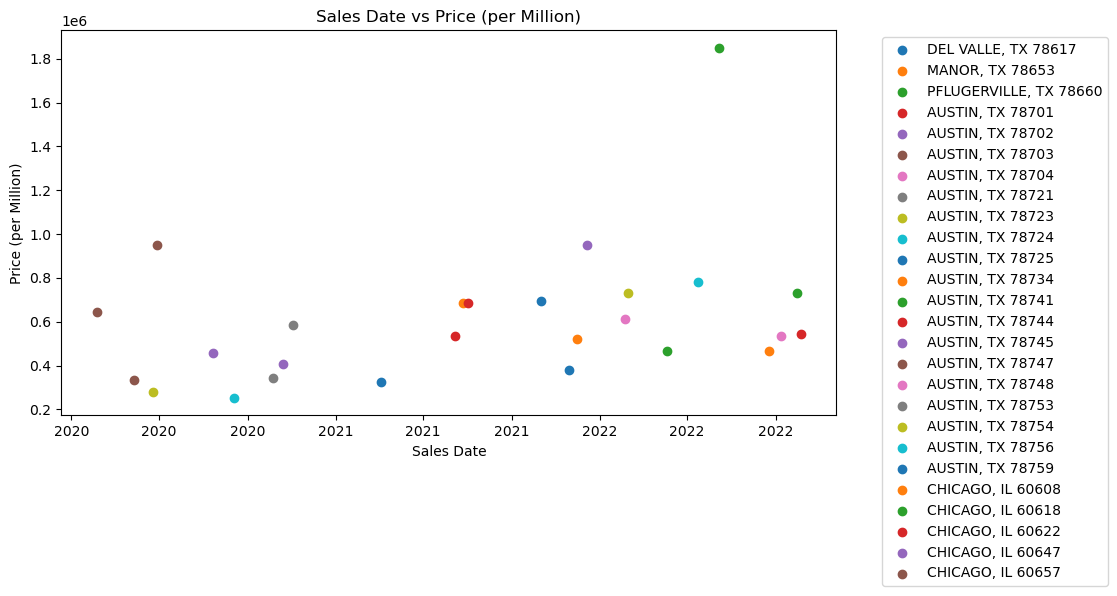

In [16]:
import matplotlib.dates as mdates
# Convert 'Sales Date' to datetime format
combined_df['Sales Date'] = pd.to_datetime(combined_df['Sales Date'])
# Convert 'Price' to numeric
combined_df['Price'] = pd.to_numeric(combined_df['Price'], errors='coerce')

fig, ax = plt.subplots(figsize=(10, 5))  

cities = combined_df["City State Zip"].unique()
for city in cities:
    city_data = combined_df[combined_df["City State Zip"] == city]
    ax.scatter('Sales Date', 'Price', data=city_data, label=city)

# Set axis labels and title
ax.set_xlabel("Sales Date")
ax.set_ylabel("Price (per Million)")
ax.set_title("Sales Date vs Price (per Million)")

# Specify the date format
date_format = mdates.DateFormatter('%Y')  # Displaying just the year
ax.xaxis.set_major_formatter(date_format)


# Display legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

#Save the figure
plt.savefig("house_price_per_mil.png")

#Show plot
plt.show()